In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cv2
from sklearn.cluster import KMeans

c:\users\lenovo\appdata\local\programs\python\python37-32\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)
c:\users\lenovo\appdata\local\programs\python\python37-32\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)
c:\users\lenovo\appdata\local\programs\python\python37-32\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


(900, 1600, 3)
<class 'numpy.ndarray'>
(25560, 3)
(120, 213, 3)


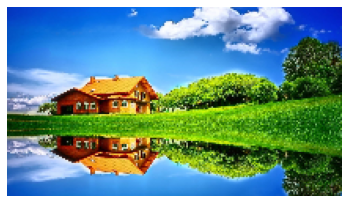

In [2]:
image = cv2.imread(r'C:\Users\LENOVO\Documents\dominantcolor\img.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
r, c = image.shape[:2]
out_r = 120
image = cv2.resize(image, (int(out_r*float(c)/r), out_r))
print(type(image))
pixels = image.reshape((-1, 3))
print(pixels.shape)
print(image.shape)
plt.axis("off")
plt.imshow(image)

In [3]:
km = KMeans(n_clusters=8)
km.fit(pixels)

KMeans()

In [4]:
colors = np.asarray(km.cluster_centers_, dtype='uint8')
print(colors)

[[ 21  48   9]
 [ 88 164 235]
 [129 188  30]
 [ 24 103 211]
 [ 64 125  21]
 [218 191  64]
 [136  46  10]
 [195 217 241]]


In [5]:
percentage = np.asarray(np.unique(km.labels_, return_counts = True)[1], dtype='float32')
percentage = percentage/pixels.shape[0]
percentage

array([0.15156494, 0.20489046, 0.10309077, 0.22042254, 0.12453052,
       0.05465571, 0.03794992, 0.10289515], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


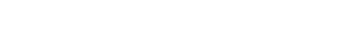

In [6]:
plt.figure(0)
for ix in range(colors.shape[0]):
    patch = np.ones((20, 20, 3))
    patch[:, :, :] = 255 - colors[ix]
    plt.subplot(1, colors.shape[0], ix+1)
    plt.axis('off')
    plt.imshow(patch)
plt.show()

In [7]:
dom = [[percentage[ix], colors[ix]] for ix in range(km.n_clusters)]
dominance = sorted(dom, key=lambda x:x[0], reverse=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


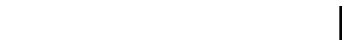

In [8]:
plt.figure(0)
plt.axis('off')

patch = np.zeros((50, 500, 3))

start = 0
for cx in range(km.n_clusters):
    width = int(dominance[cx][0] * patch.shape[1])
    end = start + width
    patch[:, start:end, :] = 255 - dominance[cx][1]
    start = end
plt.imshow(patch)
plt.show()